In [3]:
import os
import scipy
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal

import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots



seed = 0
np.random.seed(seed)
plt.style.use("ggplot")

SAVE_PLOT_DIR = "./plots"
if not os.path.exists(SAVE_PLOT_DIR):
    os.mkdir(SAVE_PLOT_DIR)

%matplotlib widget

## Univariate Normal Distribution


In [4]:
def get_univariate_normal(x, mu, sigma):
    """Generates a PDF for a Univariate Normal Distribution.

    Args:
        x: Vector of values sorted in ascending order
        mu: Mean of the Gaussian
        sigma: Standard Deviation of the Gaussian
    Returns:
        A PDF
    """
    return (
        1 / (sigma * np.sqrt(2 * np.pi)) * (np.exp(-((x - mu) ** 2) / (2 * sigma**2)))
    )


# Mean of the distribution
mu = 0.0

# Standard deviation(SD for short)
sigma = 1.0

# Generate a linspace for a random variable x
num_samples = 100
x = np.linspace(-3 * sigma + mu, 3 * sigma + mu, num=num_samples)

# Plot the value against the PDF
fig = go.Figure(
    data=go.Scatter(
        x=x,
        y=get_univariate_normal(x, mu=mu, sigma=sigma),
        line=dict(width=3, color="black"),
        fill="tonexty",
        fillcolor="skyblue",
    )
)

fig.add_annotation(x=mu, y=-0.001, text="Mean", showarrow=True, arrowhead=2)
fig.add_vline(x=mu, line_width=3, line_dash="dash", line_color="green")
fig.update_layout(
    {
        "title": {
            "text": f"Univariate Gaussian Distribution <br> μ: {mu}, σ\u00b2: {sigma**2}",
            "y": 0.95,
            "x": 0.5,
            "xanchor": "center",
            "yanchor": "top",
            "font": dict(size=14),
        },
        "xaxis": {"title": "X"},
        "yaxis": {"title": "Probability Density"},
        "margin": dict(l=0, r=0, b=0, t=50),
    }
)

fig.write_html(os.path.join(SAVE_PLOT_DIR, "univariate_normal_example.html"))
fig.write_image(os.path.join(SAVE_PLOT_DIR, "univariate_normal_example.png"))
fig.show()

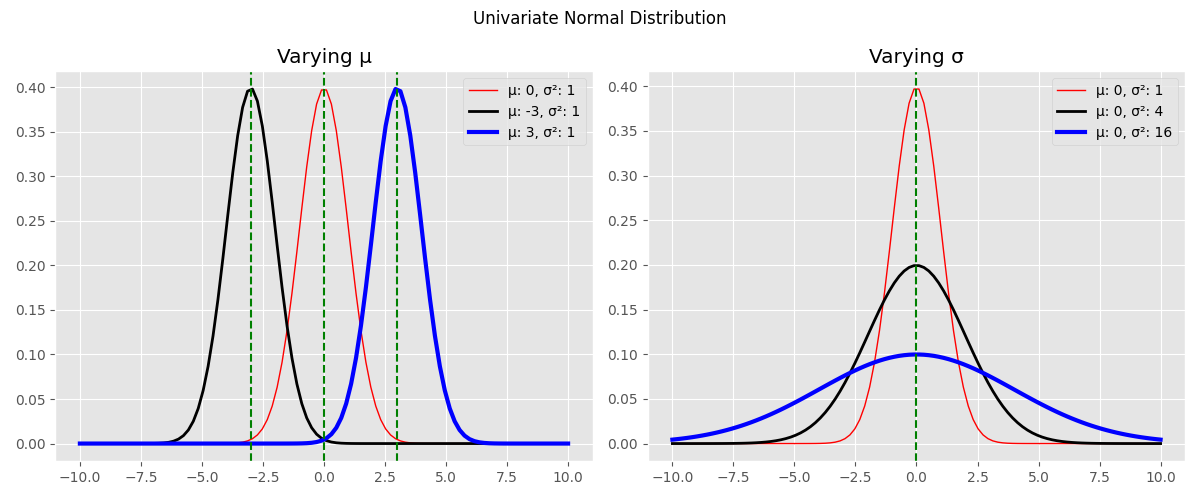

In [5]:
# Random variable x
x = np.linspace(-10.0, 10.0, 100)

# Combination of mu and sigma. The first value
# of any tuple represents mu while the second value
# represents sigma here.
mu_sigma_combos = [
    [(0, 1), (-3, 1), (3, 1)],
    [(0, 1), (0, 2), (0, 4)],
]

# Line colors and widths to be used
# for different combinations
colors = ["red", "black", "blue"]
widths = [1, 2, 3]
subtitles = ["Varying μ", "Varying σ"]

# Plot
_, ax = plt.subplots(
    1, 2, sharex=False, sharey=False, figsize=(12, 5), tight_layout=True
)
for i, elem in enumerate(mu_sigma_combos):
    legend = []
    mus = set()
    for j, comb in enumerate(elem):
        mu, sigma = comb
        mus.add(mu)
        legend.append(f"μ: {mu}, σ\u00b2: {sigma**2}")
        ax[i].plot(
            x, get_univariate_normal(x, mu, sigma), linewidth=widths[j], c=colors[j]
        )
        ax[i].tick_params(labelbottom=True)

    ax[i].set_title(subtitles[i])
    ax[i].legend(legend, loc="upper right")

    for mu in mus:
        ax[i].axvline(x=mu, color="green", linestyle="--")

plt.suptitle("Univariate Normal Distribution")
plt.savefig(
    os.path.join(SAVE_PLOT_DIR, "univariate_with_dff_mu_sigma.png"), bbox_inches="tight"
)
plt.show()

In [6]:
def get_multivariate_normal(
    mu, cov, sample=True, sample_size=None, seed=None, gen_pdf=False, pos=None
):
    """Builds a multivariate Gaussian Distribution.

    Given the mean vector and the covariance matrix,
    this function builds a multivariate Gaussian
    distribution. You can sample from this distribution,
    and generate probability density for given positions.

    Args:
        mu: Mean vector representing the mean values for
            the random variables
        cov: Covariance Matrix
        sample (bool): If sampling is required
        sample_size: Only applicable if sampling is required.
            Number of samples to extract from the distribution
        seed: Random seed to be passed for distribution, and sampling
        gen_pdf(bool): Whether to generate probability density
        pos: Applicable only if density is generated. Values for which
            density is generated
    Returns:
        1. A Multivariate distribution
        2. Sampled data if `sample` is set to True else `None`
        3. Probability Density if `gen_pdf` is set to True else `None`
    """

    # 1. Multivariate distribution from given mu and cov
    dist = multivariate_normal(mean=mu, cov=cov, seed=seed)

    # 2. If sampling is required
    if sample:
        samples = dist.rvs(size=sample_size, random_state=seed)
    else:
        samples = None

    # 3. If density is required
    if gen_pdf:
        if pos is None:
            raise ValueError("`pos` is required for generating density!")
        else:
            pdf = dist.pdf(pos)
    else:
        pdf = None

    return dist, samples, pdf


# Mean of the random variables X1 and X2
mu_x1, mu_x2 = 0, 0

# Standard deviation for the random variables X1 and X2
sigma_x1, sigma_x2 = 1, 1

# Positions for which probability density is
# to be generated
x1, x2 = np.mgrid[
    (-3.0 * sigma_x1 + mu_x1) : (3.0 * sigma_x1 + mu_x1) : 0.1,
    (-3.0 * sigma_x2 + mu_x2) : (3.0 * sigma_x2 + mu_x2) : 0.1,
]
pos = np.dstack((x1, x2))

# Mean vector
mu = [mu_x1, mu_x2]

# Covariance between the two random variables
cov_x1x2 = 0

# Covariance Matrix for our bivariate Gaussian distribution
cov = [[sigma_x1**2, cov_x1x2], [cov_x1x2, sigma_x2**2]]

# Build distribution generate density
sample = get_multivariate_normal(
    mu=mu, cov=cov, sample=False, seed=seed, gen_pdf=True, pos=pos
)


# Plot the bivariate normal density
fig = go.Figure(
    go.Surface(z=sample[2], x=x1, y=x2, colorscale="Viridis", showscale=False)
)
fig.update_layout(
    {
        "title": dict(
            text="Bivariate Distribution",
            y=0.95,
            x=0.5,
            xanchor="center",
            yanchor="top",
            font=dict(size=12),
        ),
        "scene": dict(
            xaxis=dict(title="x1"),
            yaxis=dict(title="x2"),
            zaxis=dict(title="Probability density"),
        ),
        "xaxis": dict(title="Values"),
        "yaxis": dict(title="Probability Density"),
    }
)
fig.write_html(os.path.join(SAVE_PLOT_DIR, "bivariate_normal_example.html"))
fig.write_image(os.path.join(SAVE_PLOT_DIR, "bivariate_normal_example.png"))
fig.show()

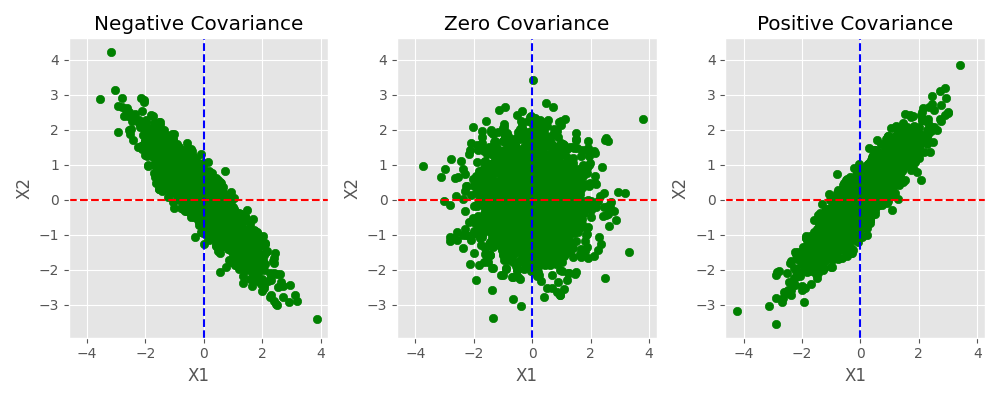

In [7]:
# Mean of the random variables X1 and X2
mu_x1, mu_x2 = 0, 0

# Standard deviation of the random variables X1 and X2
sigma_x1, sigma_x2 = 1, 1

# Number of samples to extract
sample_size = 2000

# Positions for which probability density is
# to be generated
x1, x2 = np.mgrid[
    (-3.0 * sigma_x1 + mu_x1) : (3.0 * sigma_x1 + mu_x1) : 0.1,
    (-3.0 * sigma_x2 + mu_x2) : (3.0 * sigma_x2 + mu_x2) : 0.1,
]
pos = np.dstack((x1, x2))

# Mean vector
mu = [mu_x1, mu_x2]


# Case 1: Zero Covariance
cov_x1x2 = 0
zero_cov = [[sigma_x1**2, cov_x1x2], [cov_x1x2, sigma_x2**2]]
# Build distribution, sample and generate density
zero_cov_res = get_multivariate_normal(
    mu=mu,
    cov=zero_cov,
    sample=True,
    sample_size=sample_size,
    seed=seed,
    gen_pdf=True,
    pos=pos,
)


# Case 2: Positive Covarinace
cov_x1x2 = 0.9
pos_cov = [[sigma_x1**2, cov_x1x2], [cov_x1x2, sigma_x2**2]]
# Build distribution, sample and generate density
pos_cov_res = get_multivariate_normal(
    mu=mu,
    cov=pos_cov,
    sample=True,
    sample_size=sample_size,
    seed=seed,
    gen_pdf=True,
    pos=pos,
)


# Case 3: Negative Covarinace
cov_x1x2 = -0.9
neg_cov = [[sigma_x1**2, cov_x1x2], [cov_x1x2, sigma_x2**2]]
# Build distribution, sample and generate density
neg_cov_res = get_multivariate_normal(
    mu=mu,
    cov=neg_cov,
    sample=True,
    sample_size=sample_size,
    seed=seed,
    gen_pdf=True,
    pos=pos,
)

# Plot the covariances
_, ax = plt.subplots(1, 3, figsize=(10, 4), sharex=True, sharey=True)
samples = [neg_cov_res[1], zero_cov_res[1], pos_cov_res[1]]
titles = ["Negative Covariance", "Zero Covariance", "Positive Covariance"]

for i in range(3):
    ax[i].scatter(samples[i][:, 0], samples[i][:, 1], c="green")
    ax[i].set_xlabel("X1")
    ax[i].set_ylabel("X2")
    ax[i].set_title(titles[i])
    ax[i].tick_params(labelleft=True)
    ax[i].axvline(x=mu[0], color="blue", linestyle="--")
    ax[i].axhline(y=mu[1], color="red", linestyle="--")

plt.tight_layout()
plt.savefig(os.path.join(SAVE_PLOT_DIR, "covariance_pair_plot.png"))
plt.show()

In [8]:
fig = go.Figure(
    go.Surface(z=neg_cov_res[2], x=x1, y=x2, colorscale="Hot", showscale=False)
)
fig.update_layout(
    {
        "title": dict(
            text=f"Bivariate Distribution<br>cov_x1x2: {neg_cov[0][1]:.2f}",
            y=0.95,
            x=0.5,
            xanchor="center",
            yanchor="top",
            font=dict(size=12),
        ),
        "scene": dict(
            xaxis=dict(title="X1"),
            yaxis=dict(title="X2"),
            zaxis=dict(title="Probability density"),
        ),
        "xaxis": dict(title="Values"),
        "yaxis": dict(title="Probability Density"),
    }
)

fig.write_html(
    os.path.join(SAVE_PLOT_DIR, "bivariate_negative_covariance_density.html")
)
fig.write_image(
    os.path.join(SAVE_PLOT_DIR, "bivariate_negative_covariance_density.png")
)
fig.show()

In [9]:
fig = go.Figure(
    go.Surface(z=zero_cov_res[2], x=x1, y=x2, colorscale="Viridis", showscale=False)
)
fig.update_layout(
    {
        "title": dict(
            text=f"Bivariate Distribution<br>cov_x1x2: {zero_cov[0][1]:.2f}",
            y=0.95,
            x=0.5,
            xanchor="center",
            yanchor="top",
            font=dict(size=12),
        ),
        "scene": dict(
            xaxis=dict(title="X1"),
            yaxis=dict(title="X2"),
            zaxis=dict(title="Probability density"),
        ),
        "xaxis": dict(title="Values"),
        "yaxis": dict(title="Probability Density"),
    }
)
fig.write_html(os.path.join(SAVE_PLOT_DIR, "bivariate_zero_covariance_density.html"))
fig.write_image(os.path.join(SAVE_PLOT_DIR, "bivariate_zero_covariance_density.png"))
fig.show()

In [10]:
# Mean of the random variables X1 and X2
mu_x1, mu_x2 = 0, 0

# Standard deviation of the random variables X1 and X2
# Remember the std. is going to be the same
# along all the dimensions.
sigma_x1 = sigma_x2 = 2

# Number of samples to extract
sample_size = 5000

# Positions for which probability density is
# to be generated
x1, x2 = np.mgrid[
    (-3.0 * sigma_x1 + mu_x1) : (3.0 * sigma_x1 + mu_x1) : 0.1,
    (-3.0 * sigma_x2 + mu_x2) : (3.0 * sigma_x2 + mu_x2) : 0.1,
]
pos = np.dstack((x1, x2))

# Mean vector
mu = [mu_x1, mu_x2]


# Because the covariance matrix of an multivariate isotropic
# gaussian is a diagonal matrix, hence the covariance for
# the dimension will be zero.
cov_x1x2 = 0
cov = [[sigma_x1**2, cov_x1x2], [cov_x1x2, sigma_x2**2]]


isotropic_gaussian = get_multivariate_normal(
    mu=mu,
    cov=cov,
    sample=True,
    sample_size=sample_size,
    seed=seed,
    gen_pdf=True,
    pos=pos,
)

fig = make_subplots(
    rows=1,
    cols=2,
    shared_yaxes=False,
    shared_xaxes=False,
    specs=[[{"type": "scatter"}, {"type": "surface"}]],
    subplot_titles=(
        "Covariance x1_x2 = 0.0",
        f"mu_x1: {mu_x1} sigma_x1: {sigma_x1**2} <br>mu_x2: {mu_x2} sigma_x2: {sigma_x2**2}",
    ),
)


fig.add_trace(
    go.Scatter(
        x=isotropic_gaussian[1][:, 0],
        y=isotropic_gaussian[1][:, 1],
        mode="markers",
        marker=dict(size=5, color="green"),
    ),
    row=1,
    col=1,
)

fig.add_trace(
    go.Surface(z=isotropic_gaussian[2], x=x1, y=x2, colorscale="RdBu", showscale=False),
    row=1,
    col=2,
)

fig.update_layout(
    {
        "scene": dict(
            xaxis=dict(title="X1"),
            yaxis=dict(title="X2"),
            zaxis=dict(title="Probability density"),
        ),
        "xaxis": {"title": "X1"},
        "yaxis": {"title": "X2"},
        "title": {"text": "Isotropic Gaussian", "x": 0.5, "font": dict(size=20)},
    }
)

fig.write_html(os.path.join(SAVE_PLOT_DIR, "isotropic_gaussian.html"))
fig.write_image(os.path.join(SAVE_PLOT_DIR, "isotropic_gaussian.png"))
fig.show()

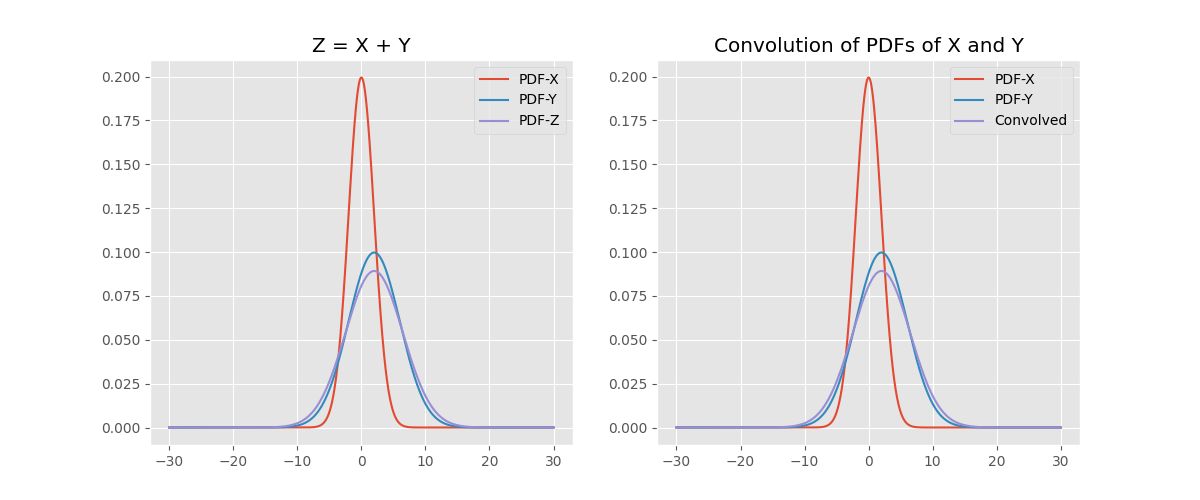

In [11]:
# Mean and Standard deviation of X
mu_x = 0.0
sigma_x = 2.0

# Mean and Standard deviation of Y
mu_y = 2.0
sigma_y = 4.0

# Mean and Standard deviation of Z
mu_z = mu_x + mu_y
sigma_z = np.sqrt(sigma_x**2 + sigma_y**2)

# Get the distributions
dist_x = norm(loc=mu_x, scale=sigma_x)
dist_y = norm(loc=mu_y, scale=sigma_y)
dist_z = norm(loc=mu_z, scale=sigma_z)

# Generate the PDFs
step_size = 1e-4
points = np.arange(-30, 30, step_size)

pdf_x = dist_x.pdf(points)
pdf_y = dist_y.pdf(points)
pdf_z = dist_z.pdf(points)


# NOTE: We cannot convolve over continous functions using `numpy.convolve(...)`
# Hence we will discretize our PDFs into PMFs using the step size we defined above
pmf_x = pdf_x * step_size
pmf_y = pdf_y * step_size

# Convolve the two PMFs
conv_pmf = np.convolve(pmf_x, pmf_y, mode="same")
conv_pdf = conv_pmf / step_size


# Let's plot the distributions now and check if we have gotten
# the same distribution as Z.
# NOTE: As we have approximated PMF from PDF, there would be
# erros in the approximation. So, the final result may not
# look 100% identical.

_, ax = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(12, 5))

ax[0].plot(points, pdf_x)
ax[0].plot(points, pdf_y)
ax[0].plot(points, pdf_z)
ax[0].set_title("Z = X + Y")
ax[0].legend(["PDF-X", "PDF-Y", "PDF-Z"])

ax[1].plot(points, pdf_x)
ax[1].plot(points, pdf_y)
ax[1].plot(points, conv_pdf)
ax[1].set_title("Convolution of PDFs of X and Y")
ax[1].legend(["PDF-X", "PDF-Y", "Convolved"])

plt.savefig(os.path.join(SAVE_PLOT_DIR, "convolution_of_pdfs.png"))
plt.show()

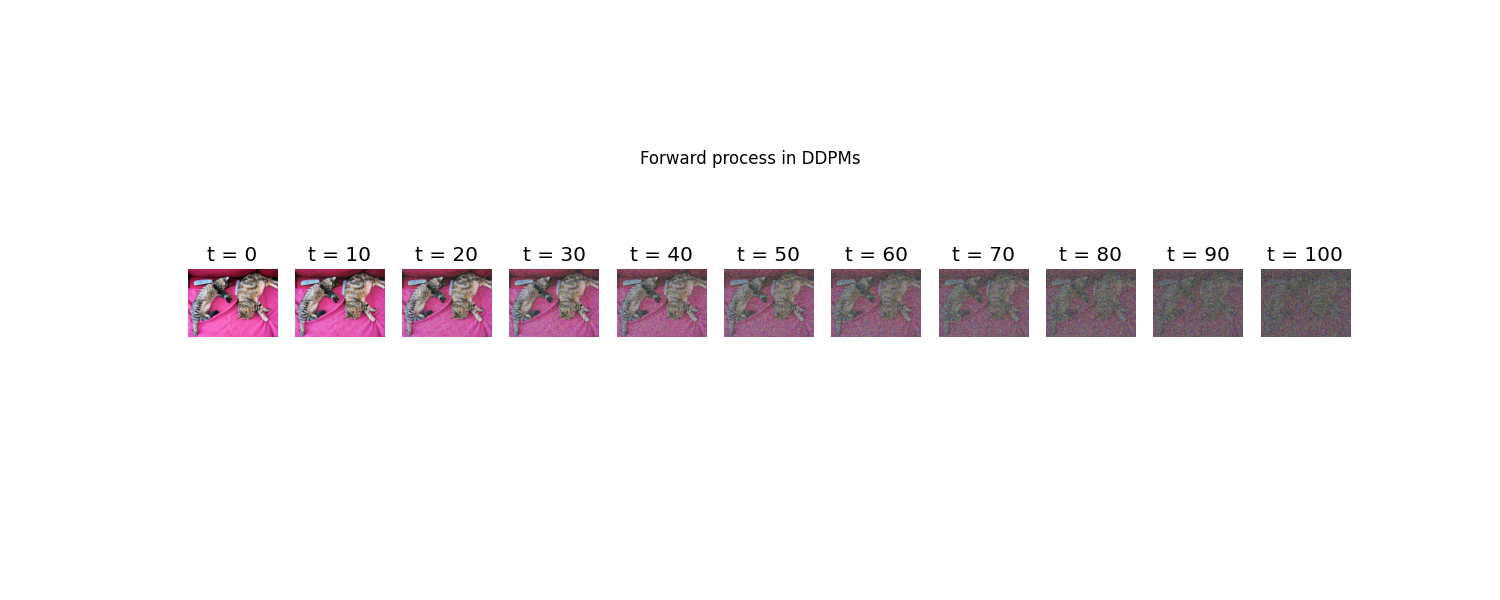

In [12]:
def forward_process_ddpms(img_t_minus_1, beta, t):
    """Implements the forward process of a DDPM model.

    Args:
        img_t_minus_1: Image at the previous timestep (t - 1)
        beta: Scheduled Variance
        t: Current timestep
    Returns:
        Image obtained at current timestep
    """

    # 1. Obtain beta_t. Reshape it to have the same number of dimensions as our image array
    beta_t = beta[t].reshape(-1, 1, 1)

    # 2. Calculate mean and variance
    mu = np.sqrt((1.0 - beta_t)) * img_t_minus_1
    sigma = np.sqrt(beta_t)

    # Obtain image at timestep t
    img_t = mu + sigma * np.random.randn(*img_t_minus_1.shape)
    return img_t


# Load the image
from PIL import Image
import requests

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
img = Image.open(requests.get(url, stream=True).raw)  # PIL image of shape HWC

# Resize the image
IMG_SIZE = 128
img.resize((IMG_SIZE, IMG_SIZE))

# Define number of timesteps
timesteps = 100

# Generate beta (variance schedule)
beta_start = 0.0001
beta_end = 0.05
beta = np.linspace(beta_start, beta_end, timesteps, dtype=np.float32)

processed_images = []
img_t = np.asarray(img.copy(), dtype=np.float32) / 255.0

# Run the forward process to obtain img after t_timesteps
for t in range(timesteps):
    img_t = forward_process_ddpms(img_t, beta, t)

    if t % 10 == 0 or t == timesteps - 1:
        sample = (img_t.clip(0, 1) * 255.0).astype(np.uint8)
        processed_images.append(sample)

# Plot the samples ath different timesteps
_, ax = plt.subplots(1, len(processed_images), figsize=(15, 6))

for i, sample in enumerate(processed_images):
    ax[i].imshow(sample)
    ax[i].set_title(f"t = {i*10}")
    ax[i].axis("off")
    ax[i].grid(False)

plt.suptitle("Forward process in DDPMs", y=0.75)
plt.savefig(os.path.join(SAVE_PLOT_DIR, "ddpm_forward_process.png"))
plt.show()